<a href="https://colab.research.google.com/github/elle-ctrl/blog/blob/main/Bayesian_A_B_Testing_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
np.random.seed(45)
from scipy.stats import beta
import matplotlib.pyplot as plt

In [ ]:
group_size = 1000
A_group, B_group = np.random.rand(2, group_size) #CTR between 0 and 1

A_successes = sum(A_group < 0.15) # A variant has a true success rate of 15%
B_successes = sum(B_group < 0.20) # B variant has a true success rate of 20%

A_failures = group_size - A_successes
B_failures = group_size - B_successes

In [ ]:
A_posterior = beta(A_successes + 8, A_failures + 42) # Prior Beta(8,42), A_posterio = prior + A's data
B_posterior = beta(B_successes + 8, B_failures + 42)

In [ ]:
A_values = A_posterior.rvs(size=100_000) # get some randon values from the distribution
B_values = B_posterior.rvs(size=100_000)

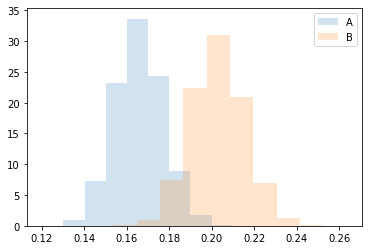

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.hist(A_values, density=True, histtype='stepfilled', alpha=0.2, label='A')
ax.hist(B_values, density=True, histtype='stepfilled', alpha=0.2, label='B')
ax.legend()
plt.show()

# Add x title: click rate

In [ ]:
sum(B_values > A_values)/100_000

0.98587

https://www.youtube.com/watch?v=nRLI_KbvZTQ&ab_channel=PyConCanada

In [ ]:
# Calculate a p-ish value with Monte Carlo simulation
# Model a problem and the repeat the exp many times to get a solution?

import pandas as pd
n_trials = 100_000
A_samples = pd.Series([A_posterior.rvs() for _ in range(n_trials)])
B_samples = pd.Series([B_posterior.rvs() for _ in range(n_trials)])

B_wins = sum(B_samples > A_samples)

B_wins/n_trials # ~ one-sided p-value of 0.02. B has 99% probability of being better than A.

0.9863

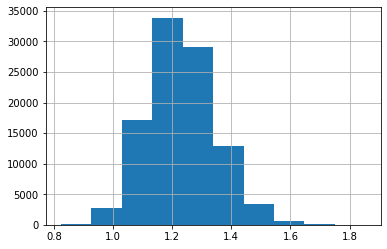

In [ ]:
B_relative = B_samples / A_samples
B_relative.hist() # Relative performance of B over A

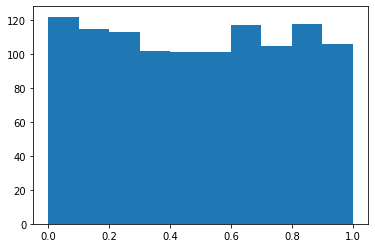

In [ ]:
from matplotlib import pyplot
"""Same distribution. uniform
"""
iid = np.concatenate([np.random.rand(300),
                            np.random.rand(300),
                            np.random.rand(500)])
plt.hist(iid)
plt.show()

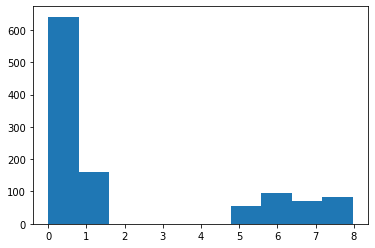

In [ ]:
not_iid = np.concatenate([np.random.rand(300),
                            np.random.rand(300)*3+5,
                            np.random.rand(500)])
plt.hist(not_iid)
plt.show()

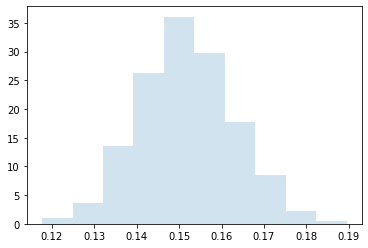

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
#ax.hist(t, density=True, histtype='stepfilled', alpha=0.2)
plt.show()

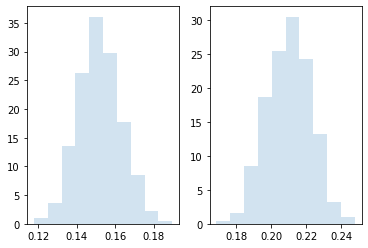

In [ ]:
fig, ax = plt.subplots(1, 2)
ax[0].hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax[1].hist(t, density=True, histtype='stepfilled', alpha=0.2)
plt.show()